The dimensionless time are:
 [0.21875114 0.43750227 0.65625341 0.87500455 1.09375568 1.31250682
 1.53125795 1.75000909 1.96876023 2.18751136 2.4062625  2.62501364
 2.84376477 3.06251591 3.28126705]
The dimensionless water influx estimation at the end of each year are:
 [4.37349006e+07 8.30936733e+07 1.18654933e+08 1.50911542e+08
 1.80284142e+08 2.07132458e+08 2.31764769e+08 2.54445825e+08
 2.75403503e+08 2.94834385e+08 3.12908445e+08 3.29773007e+08
 3.45556064e+08 3.60369097e+08 3.74309439e+08]
The total dimensionless water influx estimate after 15 years is: 374,309,438.94344


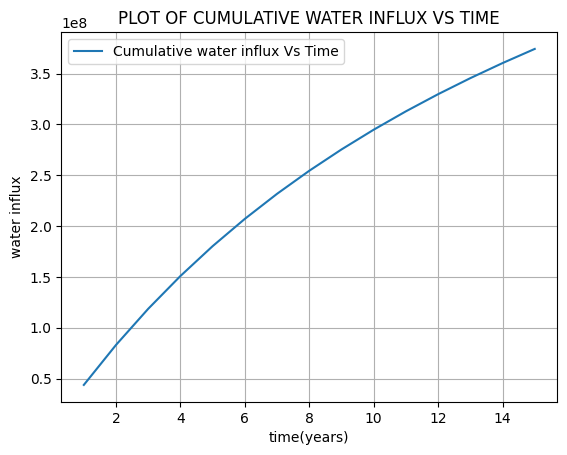

The Estimation of OOIP after 15 years of production is 554,430,225,566.40649 STB


In [ ]:
# OBJECTIVE: Using the Van Everdingen-Hurst method for modeling radial aquifer support in reservoirs
# GOAL: simulating cumulative water influx over 15 years of primary recovery using dimensionless time and water influx functions.
# Assuming constant pressure drop during primary recovery.

import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

#Reservoir parameters
k = 150 #md permeability
h = 50 #ft thickness
ϕ = 0.22 #porosity
c_t = 1.2 * 10**-5 #psi^-1 total compressibility
μ = 1 #cp water viscosity
p_i = 3500 #psi initial pressure
p_wf = 1500 #psi average bottom-hole pressure
r_e = 5000 #ft reservoir radius (external aquifer radius)
r_w = 0.25 #ft wellbore radius
B = 1 # RB/STB formation volume factor
OOIP = 554_804_535_005.350 # STB Original Oil In Place.

#Dimensionless time (t_d) computation for 15 years.
years = np.arange(1,16)
t = years * 365 #time (days)
t_d = 0.0002637*k*t/(ϕ*μ*c_t*r_e**2)
print("The dimensionless time are:\n",t_d)

# Computing Water Influx Equation (Van Everdingen-Hurst Radial)
second_term = 4*np.pi*k*h*(p_i-p_wf)/(μ*B)

# u is unknown, so I define the function
def veh(u):
    return (1 - np.exp(-u))/u

third_term = np.array([quad(veh,1e-8,td)[0] for td in t_d]) 

# Dimensionless water influx estimation
W_e =  1.119 * second_term * third_term
#we_td = W_e(t_d)
print("The dimensionless water influx estimation at the end of each year are:\n",W_e)

dimensionless_water_influx_estimate = W_e[-1]
print(f"The total dimensionless water influx estimate after 15 years is: {dimensionless_water_influx_estimate:,.5f}")

#VISUALIZATION
plt.plot(years,W_e,label ="Cumulative water influx Vs Time")
plt.xlabel("time(years)")
plt.ylabel("water influx")
plt.title("PLOT OF CUMULATIVE WATER INFLUX VS TIME")
plt.legend()
plt.grid()
plt.show()

#Estimation of OOIP after 15 years of production
Estimate_Net_Oil_Remaining_After_15_Years = OOIP - dimensionless_water_influx_estimate
print(f"The Estimation of OOIP after 15 years of production is {Estimate_Net_Oil_Remaining_After_15_Years:,.5f} STB")


















    
    
    








